In [2]:
import numpy as np

import sys
sys.path.append("../")

from src.utils import risk, params, backtest
from src.training import train
from src.data import preprocess, download
from src.models import predict

%reload_ext autoreload
%autoreload 2
    
NUM_STOCKS = 5
N_REGIMES = 3
           
SEQ_LEN = 128
D_MODEL = 64
N_HEAD = 4
N_LAYERS = 2
N_CLASSES = 2
BATCH_SIZE = 32
LR = 1e-5
EPOCHS = 5
DROPOUT = 0.1
WEIGHT_DECAY = 1e-3

In [3]:
for t in (1, 5, 21):
    valid_tickers = preprocess.generate_valid_tickers(start_date='2010-12-01',
                                                      end_date='2025-12-01',
                                                      num_stocks=NUM_STOCKS)
    
    X, y, stock_ids, regime_X, full_df = preprocess.generate_model_inputs(tickers=valid_tickers,
                                                                          train_start='2010-12-01',
                                                                          train_end='2020-12-01',
                                                                          seq_len=SEQ_LEN,
                                                                          hold_days=t)
    print('\n')
    train.train_model(X, y, stock_ids, regime_X, hold_days=t)

    print('\nNext iteration:\n')

Model is not converging.  Current: -30301.15173545101 is not greater than -30301.15163343456. Delta is -0.0001020164490910247


Load successful:
~~~~~~~~~~~~~~~~~~~~~~
Number of rows: 11680
Number of features: 28
Number of stocks: 5


Beginning training for 5 epochs on device "mps"
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1: Loss = 0.66. Time taken = 6.19 seconds.
Epoch 2: Loss = 0.70. Time taken = 5.83 seconds.
Epoch 3: Loss = 0.65. Time taken = 5.83 seconds.
Epoch 4: Loss = 0.68. Time taken = 5.91 seconds.
Epoch 5: Loss = 0.73. Time taken = 5.89 seconds.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training success. Model saved: ../results/model/model_1.pth

Next iteration:

Load successful:
~~~~~~~~~~~~~~~~~~~~~~
Number of rows: 11660
Number of features: 28
Number of stocks: 5


Beginning training for 5 epochs on device "mps"
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1: Loss = 0.66. Time taken = 5.93 seconds.
Epoch 2: Loss = 0.62. Time taken = 5.83 seconds.
Epoch 3: Loss = 0.75. Time taken = 5.82 seconds.
Epoch 4: Loss = 0.65. Time taken = 5.85 seconds.
Epoch 5: Loss = 0.68. Ti

In [4]:
predict.model_prediction(valid_tickers, full_df, feature_dim=X.shape[2], hold_days=(1,5,21))

Predicted dataframe saved: ../data/processed/predicted_df.csv


In [5]:
param_grid ={'long_threshold': np.arange(55, 80, 5)/100,
             'short_threshold': np.arange(25, 50, 5)/100,
             'target_vol': np.arange(10, 30, 5)/100,
             'slippage': 1,
             'commission': 1,
             'take_profit': np.arange(2, 21)/100,
             'stop_loss': -np.arange(2, 11)/100,
             'max_hold_days': np.arange(15, 31),
             'max_drawdown': 0.2,
             'leverage': np.arange(1, 10)}

param_grid_best, sharpe = backtest.optimise_sharpe(param_grid,
                                                   trials=300,
                                                   start_date='2021-01-01',
                                                   end_date='2025-11-01')

Starting for 300 trials:

Test number: 10
Test number: 20
Test number: 30
Test number: 40
Test number: 50
Test number: 60
Test number: 70
Test number: 80
Test number: 90
Test number: 100
Test number: 110
Test number: 120
Test number: 130
Test number: 140
Test number: 150
Test number: 160
Test number: 170
Test number: 180
Test number: 190
Test number: 200
Test number: 210
Test number: 220
Test number: 230
Test number: 240
Test number: 250
Test number: 260
Test number: 270
Test number: 280
Test number: 290
Test number: 300


In [6]:
param_grid_best, sharpe

({'long_threshold': 0.55,
  'short_threshold': 0.45,
  'target_vol': 0.2,
  'slippage': 1.0,
  'commission': 1.0,
  'take_profit': 0.1,
  'stop_loss': -0.02,
  'max_hold_days': 30.0,
  'max_drawdown': 0.2,
  'leverage': 7.0},
 3.834481759643427)

Strategy final equity: 34,662
Buy-and-hold final equity: 1,472


Sharpe Ratio: 3.83
Alpha (annualised): 1.00%
Beta: 1.00


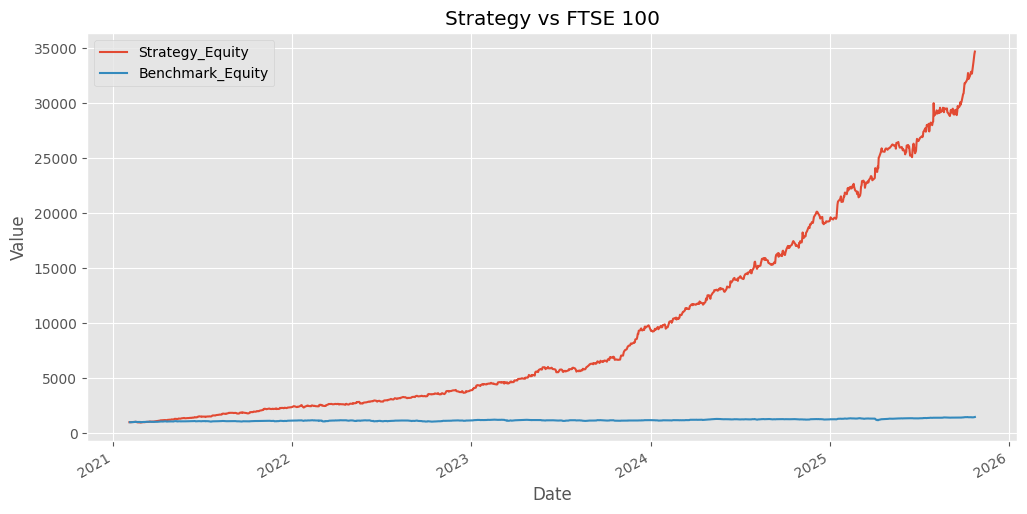

In [13]:
param_grid ={'long_threshold': 0.55,
             'short_threshold': 0.45,
             'target_vol': 0.2,
             'slippage': 1,
             'commission': 1,
             'take_profit': 0.1,
             'stop_loss': -0.02,
             'max_hold_days': 30,
             'max_drawdown': 0.2,
             'leverage': 7}

s, b, r = backtest.backtest(param_grid_best,
                            start_date='2021-01-01',
                            end_date='2025-11-01')

In [14]:
risk.full_risk_report(s, b, r)

,Strategy,Benchmark
Mean Daily Return,0.31%,0.04%
Daily Vol,1.24%,0.80%
Annualized Vol,19.76%,12.72%
Sharpe Ratio,3.83,0.47
Sortino Ratio,-25.46,-25.17
Max Drawdown,-8.40%,-13.43%
Drawdown Duration (days),54,288
Win Rate,58.83%,55.00%
Loss Rate,41.17%,44.91%
Payoff Ratio,1.37,0.93
